In [72]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

# Import data
apples = pd.read_csv('/Users/alexa/Documents/git py analysis/Apple Stocks/02-data/AppleStockPrices.csv')
print(apples.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


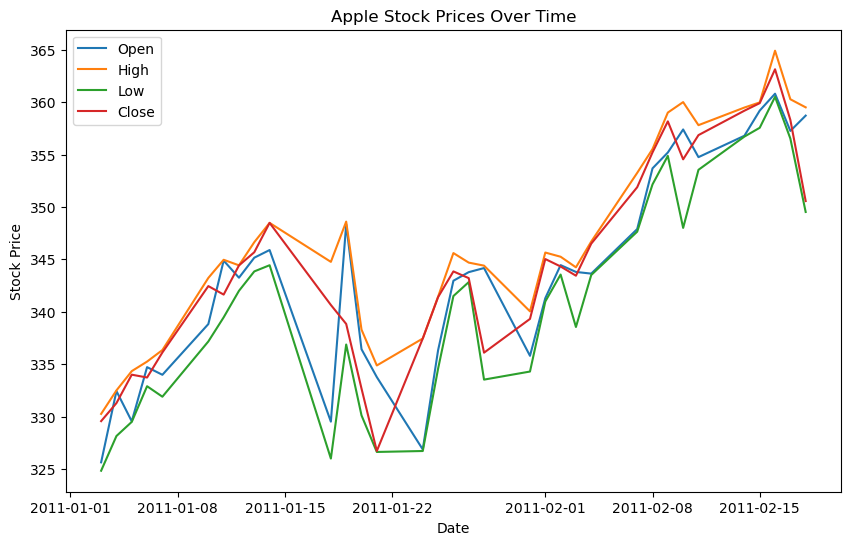

In [73]:
# Line plot for each column so we can explore the data
date = apples['Date']
open_a = apples['Open']
high = apples['High']
low = apples['Low']
close = apples['Close']
volume = apples['Volume']

# Convert date column to date_time
apples['Date'] = pd.to_datetime(apples['Date'])

# Set 'Date' as the index to make it easier for plotting
apples.set_index('Date', inplace=True)

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot different columns
plt.plot(apples.index, apples['Open'], label='Open')
plt.plot(apples.index, apples['High'], label='High')
plt.plot(apples.index, apples['Low'], label='Low')
plt.plot(apples.index, apples['Close'], label='Close')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Apple Stock Prices Over Time')
plt.legend()  # Adds a legend to differentiate the lines

# Display the plot
plt.show()

**Observations and questions**
- Do low's and high's correlate?
- Open seems to shoot down before a sharp rise?
    - Below previous close
    - Crossing over close on the way down
    - Seems to be periods with the biggest gap between high and low
    - e.g. ~01/05, 01/10, 01/22, 01/30, 02/03, 02/10
    - Is this a pattern that we can test?
- Periods of rise appear to have few fluctuations
    - 01/01 - 01/15 and 02/01 - 02/15
- Open is almost always higher than the low
- Open is almost always lower than the high

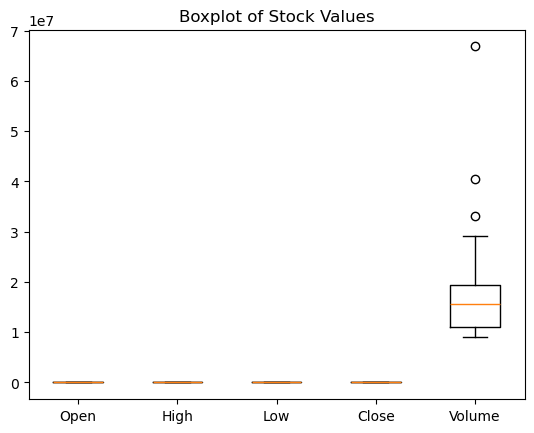

In [74]:
# Create boxplots for the main 5 columns

# Select the columns 
data = [apples['Open'], apples['High'], apples['Low'], apples['Close'], apples['Volume']]

# Create boxplots 
fig, ax = plt.subplots()
BP = ax.boxplot(data)

# Add titles and labels
ax.set_title("Boxplot of Stock Values")
ax.set_xticklabels(['Open', 'High', 'Low', 'Close', 'Volume'])

# Show the plot
plt.show()

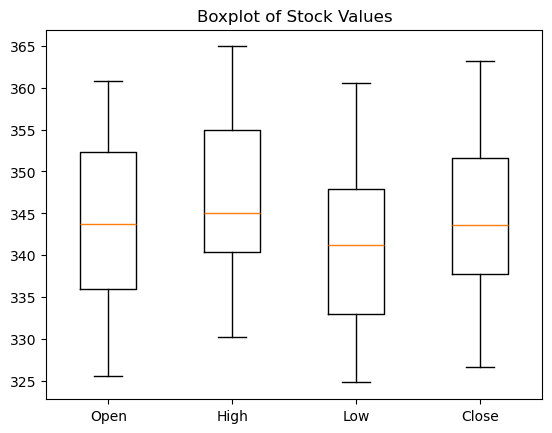

In [75]:
# With Volume removed
 
data = [apples['Open'], apples['High'], apples['Low'], apples['Close']]

# Create boxplots 
fig, ax = plt.subplots()
BP = ax.boxplot(data)

# Add titles and labels
ax.set_title("Boxplot of Stock Values")
ax.set_xticklabels(['Open', 'High', 'Low', 'Close'])

# Show the plot
plt.show()

**Notes**
- Doesn't appear to be much difference between each column
-  Median High seems to have some high values 
- All plots have whiskers either side

In [76]:
# Need to make sure columns are all being accessed correctly
a_data_frame = pd.read_csv('/Users/alexa/Documents/git py analysis/Apple Stocks/02-data/AppleStockPrices.csv')
print(a_data_frame.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


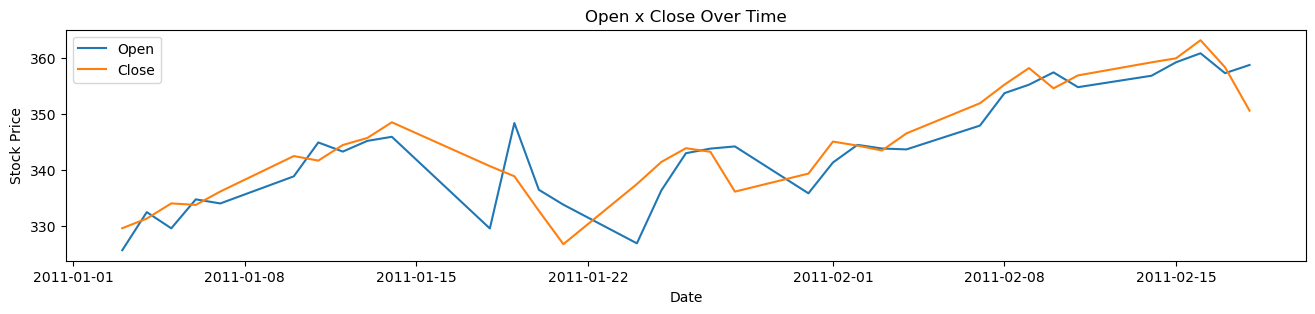

In [77]:
# Copying code from above but, limiting to open and close

# Converting 'Date' column to 'datetime' format
a_data_frame['Date'] = pd.to_datetime(a_data_frame['Date'])

# Setting the index
a_data_frame.set_index('Date', inplace=True)

# Set the overall size of the figure
plt.figure(figsize=(16, 3)) 

# The columns we want to plot
plt.plot(apples.index, a_data_frame['Open'], label='Open')
plt.plot(apples.index, a_data_frame['Close'], label='Close')

# Labeling the plot
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Open x Close Over Time')
plt.legend()

# Plotting the plot
plt.show()

**Notes**
This plot replicates the first plot in this notebook. The goal in so doing is to get a clearer view and frame a hypothesis. Specifically, the idea here is that a an increase in the closing price is preceded by a drop in the opening price. 

First let's explore a few more plots 

In [78]:
# Create a new dataframe to add a column that measures the daily difference
apples_new_import = pd.read_csv('/Users/alexa/Documents/git py analysis/Apple Stocks/02-data/AppleStockPrices.csv')
daily_diff_frame = pd.DataFrame(apples_new_import, columns=['Date', 'Open', 'Close', 'Volume'])
print(daily_diff_frame.columns)

Index(['Date', 'Open', 'Close', 'Volume'], dtype='object')


In [79]:
# Create a new column to compute the diff
daily_diff_frame['Diff'] = daily_diff_frame['Close'] - daily_diff_frame['Open']
daily_diff_frame.head()

,Date,Open,Close,Volume,Diff
0,1/3/2011,325.64,329.57,15883600,3.93
1,1/4/2011,332.44,331.29,11038600,-1.15
2,1/5/2011,329.55,334.00,9058700,4.45
3,1/6/2011,334.72,333.73,10709500,-0.99
4,1/7/2011,333.99,336.12,11096800,2.13


In [80]:
# Next we want to create an additional column for the moving average
daily_diff_frame['SMA3 Open'] = daily_diff_frame['Open'].rolling(window=3).mean()
daily_diff_frame['SMA3 Close'] = daily_diff_frame['Close'].rolling(window=3).mean()
daily_diff_frame.head()

,Date,Open,Close,Volume,Diff,SMA3 Open,SMA3 Close
0,1/3/2011,325.64,329.57,15883600,3.93,NaN,NaN
1,1/4/2011,332.44,331.29,11038600,-1.15,NaN,NaN
2,1/5/2011,329.55,334.00,9058700,4.45,329.210000,331.620000
3,1/6/2011,334.72,333.73,10709500,-0.99,332.236667,333.006667
4,1/7/2011,333.99,336.12,11096800,2.13,332.753333,334.616667


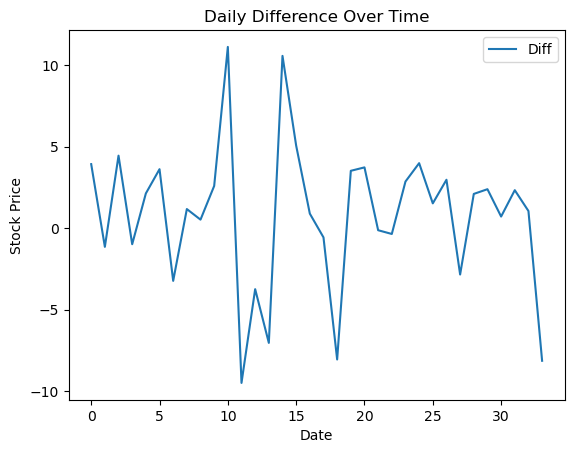

In [81]:
# We will now plot diff
plt.plot(daily_diff_frame.index, daily_diff_frame['Diff'], label='Diff')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Daily Difference Over Time')
plt.legend()
plt.show()

**Notes**

We subtracted 'Copen' from 'Close'. Therefore
- Where there is a negative value, the stock is closing lower than it is opening (Bear day)
- Where the stock is positive, it is closing higher than opening (Bullish day)

There are a couple notable points, it appears, where a Bear day precedes a Bull day. 

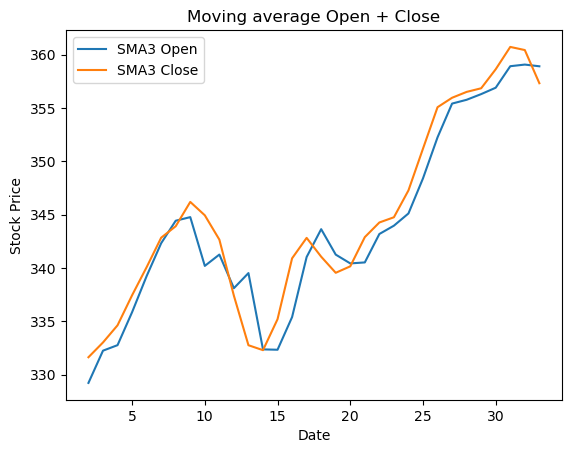

In [82]:
# Here we will plot the moving averages
plt.plot(daily_diff_frame.index, daily_diff_frame['SMA3 Open'], label='SMA3 Open')
plt.plot(daily_diff_frame.index, daily_diff_frame['SMA3 Close'], label='SMA3 Close')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Moving average Open + Close')
plt.legend()
plt.show()

**Notes**


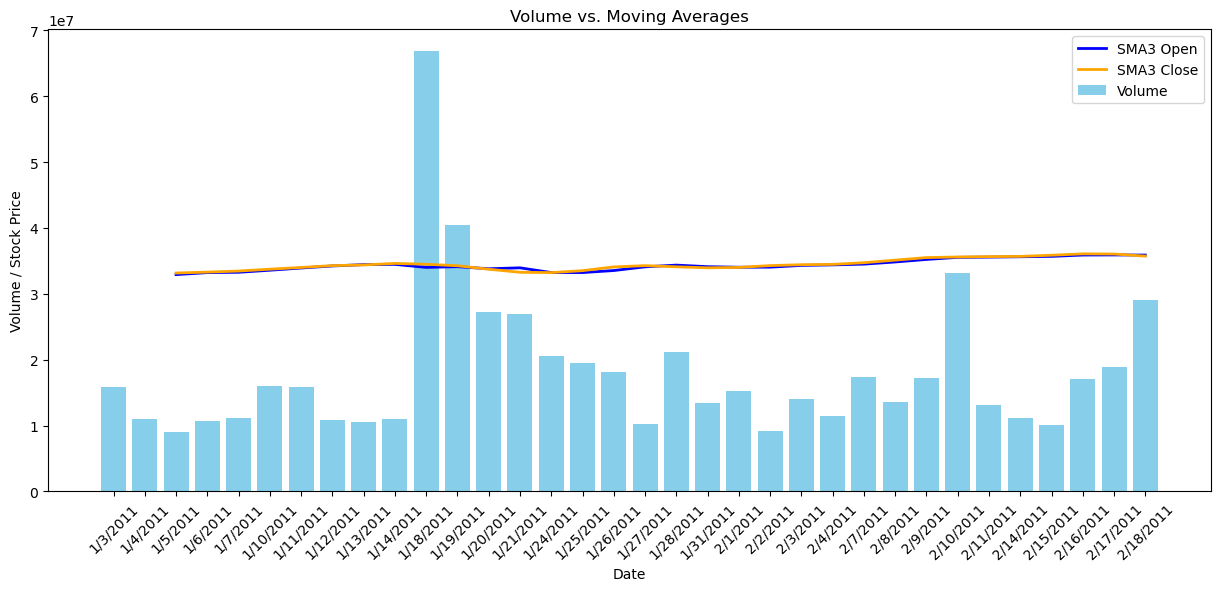

In [104]:
# We have not yet compared how volume corresponds with price

# Building a subplots frame 
fig, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=45)
x = daily_diff_frame['Date']
y = daily_diff_frame['Volume']

# Creating a Volume variable to plot 
Volume_bar = daily_diff_frame['Volume']

# Plotting the barchart
ax.bar(x, y, color='skyblue', label = 'Volume')

# Adding lines for the MA data
ax.plot(x, daily_diff_frame['SMA3 Open']*100000//1, color='blue', linewidth=2, label='SMA3 Open')
ax.plot(x, daily_diff_frame['SMA3 Close']*100000//1, color='orange', linewidth=2, label='SMA3 Close')

# Adding labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volume / Stock Price')
ax.set_title('Volume vs. Moving Averages')
ax.legend()  # Add legend to differentiate Volume and SMA lines

# Plotting the plot
plt.show()
